# Problem 1

## Problem 1.a) Analytical solution

$$\dfrac{dy}{dx} = \dfrac{1}{x^2(1-y)} \implies \int (y-1)dy = -\int \dfrac{dx}{x^2} \implies \dfrac{(y-1)^2}{2} = -\dfrac{x^{-1}}{-1} + C \implies (y-1)^2 = \dfrac{2}{x} + C $$


Given $y(1) = -1 \implies 4 = 2 + C \implies C = 2$. 
$$\therefore y = 1 \pm \sqrt{2+\dfrac{2}{x}}$$

We keep only the minus ($-$) sign since $y(1) = -1$ is given. Thus the final analytical solution is,
$$\boxed{y = 1 - \sqrt{2+\dfrac{2}{x}}}$$

For computing $y(0)$,

$$\boxed{\lim_{x\to 0^+}y = \lim_{x\to 0^+} 1 - \sqrt{2+\dfrac{2}{x}} \rightarrow -\infty}$$

This makes sense, since the derivative and functions are undefined at $x=0$ (which is why the domain is $x \in (0,1]$).

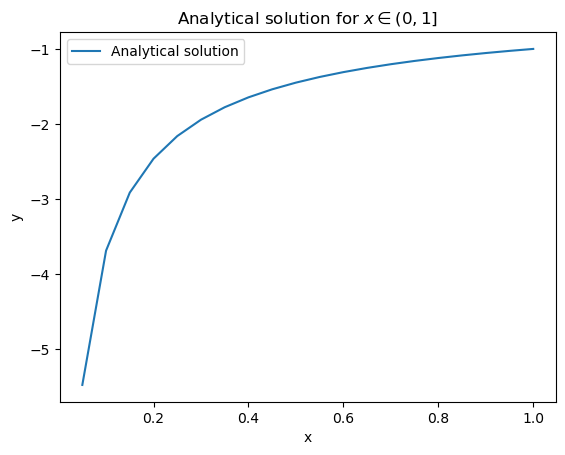

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    """
    Return derivative values at x,y (or array of x,y)
    """
    return 1/(x**2 * (1-y))

def cumulativeError(z1,z2):
    """
    Return cumulative error b/w two sets of y values.
    """
    assert z1.shape[0] == z2.shape[0] and z1.ndim == 1, "y values have different lengths!"

    return np.linalg.norm(z1-z2)

def analyticalSolution(x):
    """
    Return analytical solution of the ODE for as given input array.
    """
    return 1 - np.sqrt(2 + 2/x)

h = -0.05                           # Step size
x_vals = np.arange(1,0,h)
y_vals = analyticalSolution(x_vals)
plt.plot(x_vals,y_vals, label='Analytical solution')
plt.title('Analytical solution for $x \in (0,1]$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Problem 1.b) Euler's method

Given $f(x,y) = \dfrac{dy}{dx}$ and $x_{n+1} = x_n + h$, 
$$\boxed{y_{n+1} = y_n + hf(x_n,y_n)}$$

For this problem, $f(x,y) = \dfrac{1}{x^2(1-y)}$, $h=-0.05$ and $x \in (0,1]$, where we begin integration at $x=1$ and move left on the number line (towards 0).

For the following sections, we will use a 2 - norm formula to report extrapolation error. Given $N$ points in the analytical solution,

$$\boxed{e = \sum^{N-1}_{i=0} ||y_{\text{analytical},i} - y_{\text{numerical integration},i}|| = \sum^{N-1}_{i=0} \sqrt{\left(y_{\text{analytical},i} - y_{\text{numerical integration},i}\right)^2}}$$

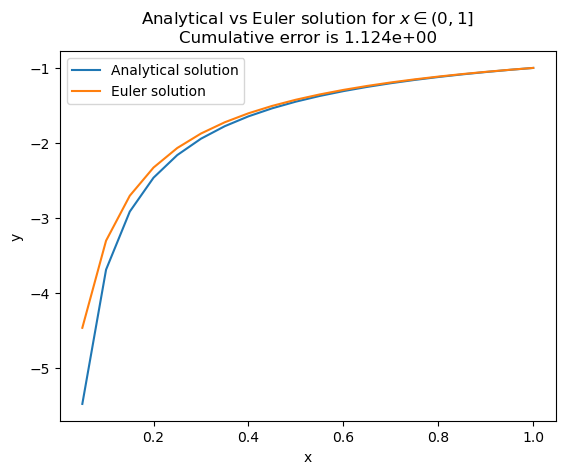

In [2]:
def EulerSolution(x,h):
    """
    Return solution of the ODE for as given input array by Euler's method. Given y(1) = -1.
    """
    N = x.shape[0]
    y = np.zeros(N)
    y[0] = -1           # Given condition

    for i in range(N-1):
        y[i+1] = y[i] + h*f(x[i], y[i])
    return y


y_vals_eul = EulerSolution(x_vals, h)
plt.plot(x_vals,y_vals, label='Analytical solution')
plt.plot(x_vals,y_vals_eul, label='Euler solution')
plt.title('Analytical vs Euler solution for $x \in (0,1]$\nCumulative error is %.3e' %(cumulativeError(y_vals, y_vals_eul)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Problem 1.c) Runge-Kutta method (4th order)

$$\begin{aligned} k_1 &=h f\left(x_n, y_n\right) \\ k_2 &=h f\left(x_n+\frac{1}{2} h, y_n+\frac{1}{2} k_1\right) \\ k_3 &=h f\left(x_n+\frac{1}{2} h, y_n+\frac{1}{2} k_2\right) \\ k_4 &=h f\left(x_n+h, y_n+k_3\right) \\ y_{n+1} &=y_n+\frac{1}{6} k_1+\frac{1}{3} k_2+\frac{1}{3} k_3+\frac{1}{6} k_4+O\left(h^5\right) \end{aligned}$$

Where we ignore the $O\left(h^5\right)$ terms.

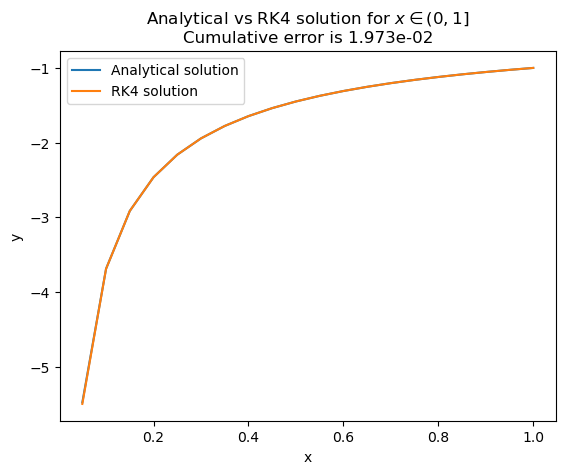

In [3]:
def RK4Solution(x,h):
    """
    Return solution of the ODE for the given input array by RK 4th order method. Given y(1) = -1.
    """
    N = x.shape[0]
    y = np.zeros(N)
    y[0] = -1           # Given condition

    for i in range(N-1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i]+ 0.5*h, y[i]+ 0.5*k1)
        k3 = h * f(x[i]+ 0.5*h, y[i]+ 0.5*k2)
        k4 = h * f(x[i]+     h, y[i]+     k3)
        y[i+1] = y[i] + k1/6 + k2/3 + k3/3 + k4/6
    
    return y


y_vals_rk4 = RK4Solution(x_vals, h)
plt.plot(x_vals,y_vals, label='Analytical solution')
plt.plot(x_vals,y_vals_rk4, label='RK4 solution')
plt.title('Analytical vs RK4 solution for $x \in (0,1]$\nCumulative error is %.3e' %(cumulativeError(y_vals, y_vals_rk4)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Problem 1.d) Richardson method

Consider $H=-0.05$ to be the step size in this case.
$$x_{n+1}=x_n+H$$

but with sub-steps
$$h=\frac{H}{n}$$
where $n=100$ is chosen arbitrarily for this implementation.

We can rewrite the integration
$$\begin{aligned}
z_0 &=y\left(x_n\right) \\
z_1 &=z_0+h f\left(x_n, z_0\right) \\
z_{m+1} &=z_{m-1}+2 h f\left(x_n+m h, z_m\right) m=1,2,3, \ldots n-1 \\
y\left(x_{n+1}\right) &=\frac{1}{2}\left[z_n+z_{n-1}+h f\left(x_{n+1}, z_n\right)\right]
\end{aligned}$$

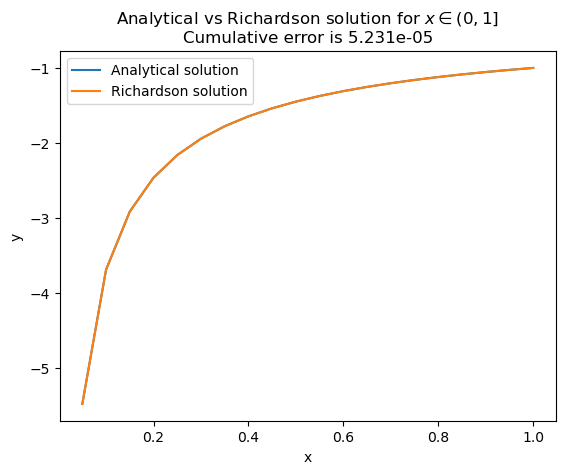

In [4]:
def RichardsonSolution(x,H,n):
    """
    Return solution of the ODE for the given input array by Richardson method. Given y(1) = -1.
    """
    h = H/n
    N = x.shape[0]
    y = np.zeros(N)
    y[0] = -1           # Given condition

    for i in range(N-1):
        z = np.zeros(n+1)
        z[0] = y[i]
        z[1] = z[0] + h*f(x[i], z[0])
        for j in range(2,n+1):
            z[j] = z[j-2] + 2*h*f(x[i]+ (j-1)*h, z[j-1])

        y[i+1] = 0.5 * (z[n] + z[n-1] + h*f(x[i+1],z[n])) 
    return y


y_vals_rich = RichardsonSolution(x_vals, h, 100)               # pass n number of substeps as well
plt.plot(x_vals,y_vals, label='Analytical solution')
plt.plot(x_vals,y_vals_rich, label='Richardson solution')
plt.title('Analytical vs Richardson solution for $x \in (0,1]$\nCumulative error is %.3e' %(cumulativeError(y_vals, y_vals_rich)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Error comparison

<center>

| Type       	            | Error     |
|--------------------------	|:-----:    |
| Euler    	                |1.12E00 	|
| Runge-Kutta (4th order) 	|1.98E-2    |
| Richardson (n=10)     	|5.23E-3    |
| Richardson (n=100)     	|5.23E-5    |
| Richardson (n=1000)     	|5.23E-7    |

</center>

We see that the RK 4th order method is very reasonable in extrapolation errors and is applicable in most physical scenarios. Richardson method also yields very good results, and the error decreases with increasing sub-step size. Euler method is noticeably worse compared to the other methods.

# Problem 2

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
%matplotlib inline

Text(0.5, 0.92, 'Cluttered table')

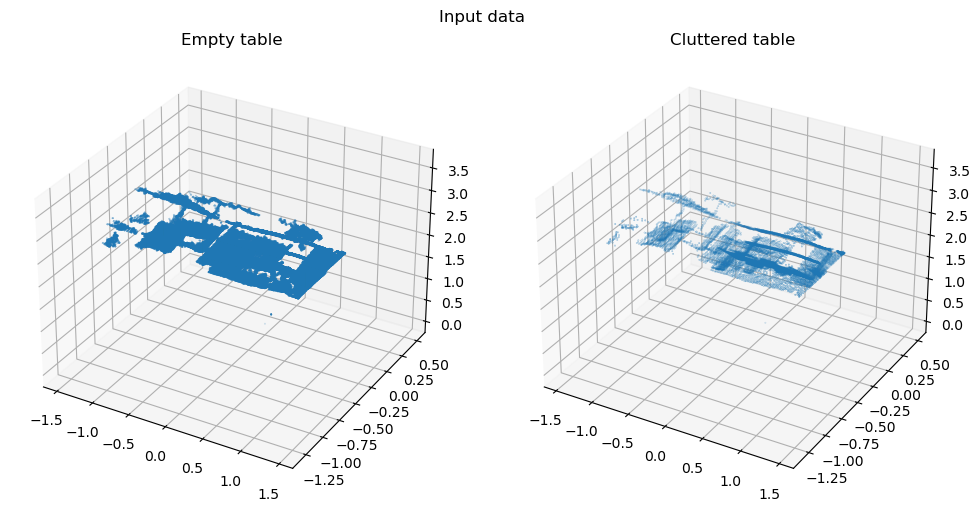

In [109]:
# Load data points after removing duplicates
empty = np.unique(np.loadtxt('Empty2.asc'), axis=0)
cluttered = np.unique(np.loadtxt('TableWithObjects2.asc'), axis=0)

# Visualize input dataset
fig = plt.figure(figsize=(10,5), constrained_layout=True)
fig.suptitle('Input data')
axs=[]
axs.append(fig.add_subplot(121, projection='3d'))
axs[0].scatter(empty[:,0], empty[:,1], empty[:,2], s=0.05)
axs[0].set_title('Empty table')
axs.append(fig.add_subplot(122, projection='3d'))
axs[1].scatter(cluttered[:,0], cluttered[:,1], cluttered[:,2], s=0.05)
axs[1].set_title('Cluttered table')

For this problem, we will implement **RANSAC** (Random Sampling and Consensus). The general idea is

1. We will randomly sample 3 points from our point cloud (since we need three points to form a plane).
2. Now, we calculate parameters required for the plane equation using the following. Given $p_1 = (x_1,y_1,z_1)$, $p_2 = (x_2,y_2,z_2)$ and $p_3 = (x_3,y_3,z_3)$, the plane is given by 
$$ax+by+cz+d=0$$
where,

$$\begin{aligned}     
    a &= (y_2 - y_1)(z_3 - z_1) - (z_2 - z_1)(y_3 - y_1)\\
    b &= (z_2 - z_1)(x_3 - x_1) - (x_2 - x_1)(z_3 - z_1)\\
    c &= (x_2 - x_1)(y_3 - y_1) - (y_2 - y_1)(x_3 - x_1)\\
    d &= -(ax_1 + by_1 + cz_1)
\end{aligned}$$

3. Next, we calculate the deviation of all the points in the point cloud from the plane. Given a point $(x_4,y_4,z_4)$, the distance from the plane is given by,
$$d = \dfrac{|ax_4 + by_4+cz_4+d|}{\sqrt{a^2+b^2+c^2}}$$
4. If the distance between the point and the plane is within a predefined threshold, then it is an inlier, else an outlier. 
$$\text{IF } d\leq d_\text{THRESH} \implies \text{inlier, ELSE outlier}$$
5. We repeat the process for given number of times (given by T) which is given by,
$$T = \lceil \dfrac{\log(1-p)}{\log(1-(1-e)^s)} \rceil$$
where $\lceil . \rceil$ is the ceiling function (returns integer).

6. The plane that has maximum number of inliers is considered to be the dominant plane, and hence the best estimate.

In [110]:
def selectRandomIndex(N,n):
    """
    Randomly select 3 points (indices) without replacement.
    """
    assert n <= N, "Dataset is smaller than the number of random elements expected!"

    idx = []
    count = 0
    while count < n:              # Randomly select 3 points from array without replacement
        num = np.random.randint(N)
        if num not in idx:
            idx.append(num)
            count+=1
    
    return idx

def getPlaneParams(p1, p2, p3):
    """
    Return plane parameters (a,b,c,d) of plane passing through 3 points.
    """
    [x1,y1,z1] = p1
    [x2,y2,z2] = p2
    [x3,y3,z3] = p3
    a = (y2 - y1)*(z3 - z1) - (z2 - z1)*(y3 - y1)
    b = (z2 - z1)*(x3 - x1) - (x2 - x1)*(z3 - z1)
    c = (x2 - x1)*(y3 - y1) - (y2 - y1)*(x3 - x1)
    d = -(a*x1 + b*y1 + c*z1)
    
    return a,b,c,d

def maxIter():
    """
    Return number of max iterations for RANSAC.
    """
    p = 0.99        # 99% confidence
    e = 0.6         # Assuming 60% outliers
    s = 3           # Sampling 3 points at a time
    return np.ceil(np.log(1-p) / np.log(1 - (1-e)**s)).astype(int)

def RANSAC(data, thresh=0.01):
    """
    DESC:   Return estimated plane data ().
    INPUT:  point cloud, distance threshold for inlier/outlier demarcation (optional)
    RETURN: Best plane parameters 
                1) 3 points that make up the plane 
                2) a,b,c,d for the plane
                3) Score (number of inliers)
                4) Inlier index
                5) Outlier index 
    """
    N = data.shape[0]
    max_iter = maxIter()
    best_params = {'planeidx':[],
                    'planeparams':[],
                    'score': 0,
                    'inliersidx':[],
                    'outliersidx':[]}


    for i in tqdm(range(max_iter)):
        inliers = []
        outliers = []

        pts = selectRandomIndex(N,3)  # Select 3 random points from N without replacement
        a,b,c,d = getPlaneParams(data[pts[0]], data[pts[1]], data[pts[2]])

        for k in range(N):          # Iterate over all points in the point cloud
            if k not in pts:        # Do not iterate over pts used for creating plane
                dist = np.abs(np.dot([a,b,c,d], [data[k,0], data[k,1], data[k,2], 1]) / np.sqrt(a**2 + b**2 +c**2))

                if dist <= thresh:
                    inliers.append(k)
                else:
                    outliers.append(k)
        
        score = len(inliers)                            # Score for this plane is number of inliers
        if  score > best_params['score']:
            best_params['planeidx'] = pts               # Best plane indices
            best_params['planeparams'] = (a,b,c,d)      # Best plane params
            best_params['score'] = score                # Best score
            best_params['inliersidx'] = inliers         # Best inliers index
            best_params['outliersidx'] = outliers       # Best outliers index
    

    return best_params

def clusterKmeans(inliers, n=2):
    """
    DESC:   Return clustered point cloud coressponding to table. (Label with max associations is returned).
    INPUT:  No. of clusters.
    RETURN: Point cloud for table only. 
    """
    kmeans = KMeans(n_clusters=n).fit(inliers)
    k = 0 if np.sum(kmeans.labels_==0) > np.sum(kmeans.labels_==1) else 1       # Since only 2 clusters are formed

    return inliers[kmeans.labels_==k]                                           # Selecting the most populated cluster as the table

def createSurfacePlaneMesh(xmin, xmax, ymin, ymax, planeparams):
    """
    DESC:   Create mesh for plotting the estimated plane
    INPUT:  Table point cloud, Plane parameters
    RETURN: 3D coordinates to plot the plane
    """
    a,b,c,d = planeparams
    x = np.linspace(xmin,xmax,50)
    y = np.linspace(ymin,ymax,50)
    xx, yy = np.meshgrid(x,y)
    zz = (-d - (a*xx + b*yy)) / c
    
    return xx,yy,zz

def plotPlane(table, xx, yy, zz, inliers, outliers, title=None):
    """
    Plot 3D visualization of inliers and estimated plane
    """

    fig = plt.figure(figsize=(12,12), constrained_layout=True)
    fig.suptitle('Clustered point cloud for %s' %(title))
    axs=[]
    axs.append(fig.add_subplot(221, projection='3d'))
    axs[0].scatter(inliers[:,0], inliers[:,1], inliers[:,2], s=0.05, color='blue', label='Inliers')
    axs[0].scatter(outliers[:,0], outliers[:,1], outliers[:,2], s=0.05, color='red', label='Outliers')
    axs[0].set_title('Inlier and outlier points')
    axs[0].legend()
    axs[0].view_init(20,70)

    axs.append(fig.add_subplot(222, projection='3d'))
    axs[1].scatter(table[:,0], table[:,1], table[:,2], s=2, label='Clustered Inliers')
    axs[1].set_title('Clustered inlier (only) point cloud')
    axs[1].view_init(20,70)

    axs.append(fig.add_subplot(223, projection='3d'))
    axs[2].scatter(table[:,0], table[:,1], table[:,2], s=2, label='Clustered Inliers')
    axs[2].plot_surface(xx, yy, zz, label='Estimated plane', color='yellow')
    axs[2].set_title('Clustered inlier point cloud with estimated plane')
    axs[2].view_init(20,70)

    axs.append(fig.add_subplot(224, projection='3d'))
    axs[3].scatter(table[:,0], table[:,1], table[:,2], s=2, label='Clustered Inliers')
    axs[3].plot_surface(xx, yy, zz, label='Estimated plane', color='yellow')
    axs[3].set_title('Clustered inlier point cloud with estimated plane\n(side view)')
    axs[3].view_init(0,0)

## Problem 2.a) Estimate plane parameters for empty and cluttered table

For this problem, we will use

- $p = 0.99$ (we want 99% accuracy in our result)
- $e = 0.6$ (Assume 60% outliers in our data, obtained empirically after plotting and observing data)
- $s = 3$ (To create a plane, we need to sample 3 points)

These parameters lead to $T=70$, which means we should compute 70 sampling iterations for the expected confidence.

We also assume the $d_\text{THRESH} = 0.02$ units (also obtained empirically by observing the data).

In [111]:
# Store plane parameters (a,b,c,d) for the two datasets
plane_params = {'empty':(), 'cluttered':()}

### Empty Table

100%|██████████| 70/70 [01:18<00:00,  1.12s/it]


Estimated plane equation is: (1.0)x + (75.0)y + (34.4)z + (-48.1) = 0


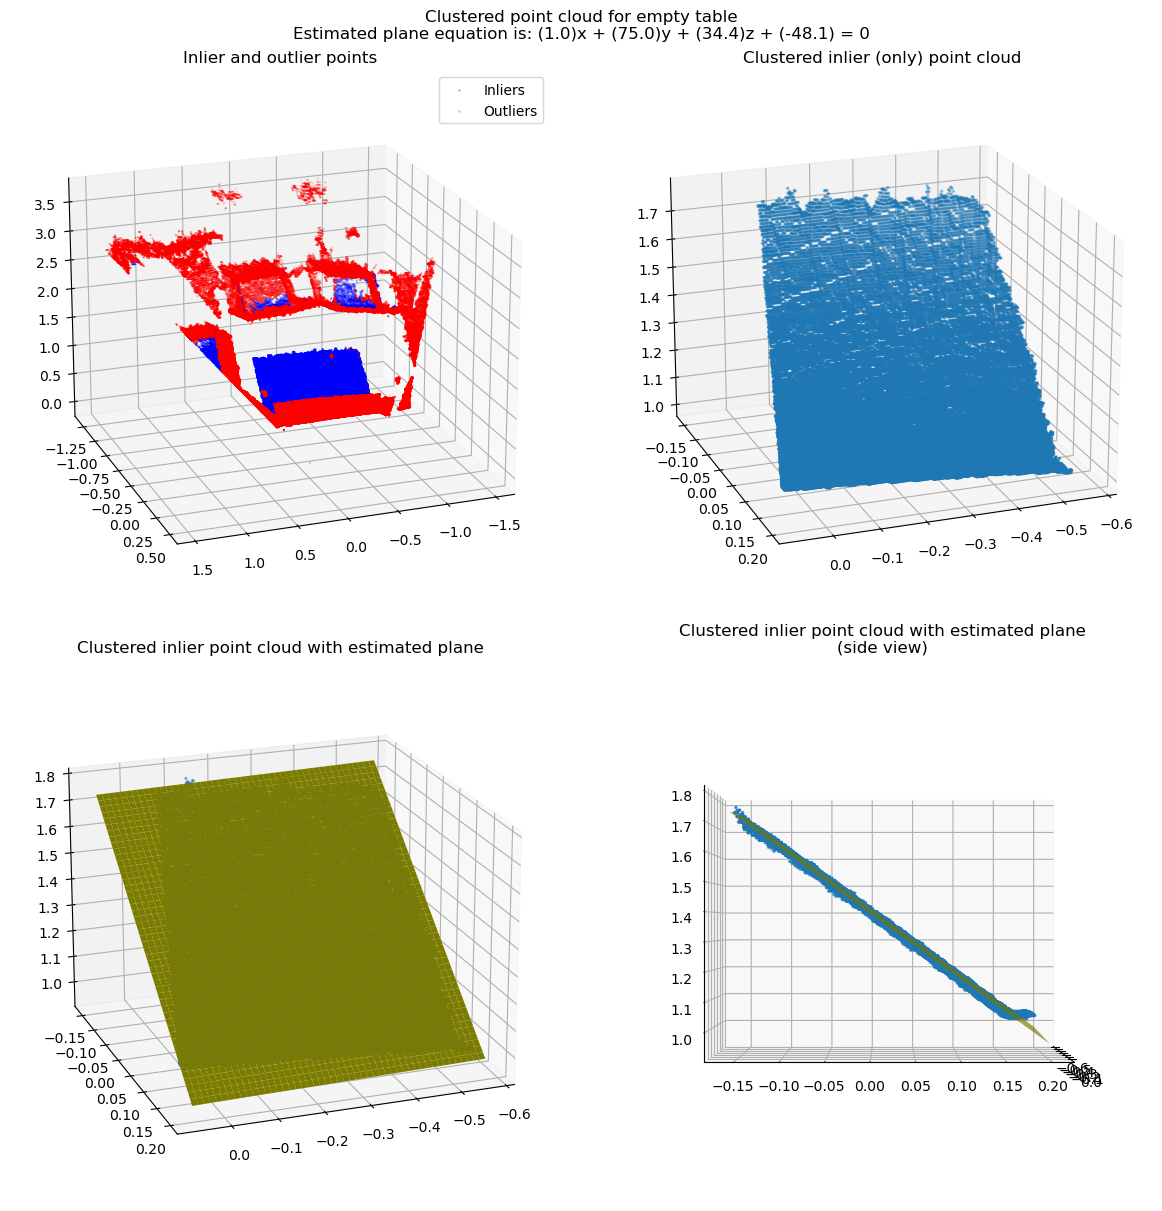

In [112]:
# Empty Table
dataset = empty
title = 'empty table'

params = RANSAC(dataset, 0.02)
inliers = dataset[params['inliersidx']]
outliers = dataset[params['outliersidx']]
a,b,c,d = params['planeparams']
plane_params['empty'] = params['planeparams']

# Kmeans clustering for seperating the table from other artifacts
table = clusterKmeans(inliers,3)                                     

# Create surface plane plot mesh
xmin, xmax = np.min(table[:,0]), np.max(table[:,0])
ymin, ymax = np.min(table[:,1]), np.max(table[:,1])
xx,yy,zz = createSurfacePlaneMesh(xmin, xmax, ymin, ymax, params['planeparams'])

plane_eq = 'Estimated plane equation is: (%.1f)x + (%.1f)y + (%.1f)z + (%.1f) = 0' %(a/a,b/a,c/a,d/a)
plotPlane(table, xx, yy, zz, inliers, outliers, title + '\n' + plane_eq)
print(plane_eq)

1. **Fig 1**:  shows the inlier (blue) and outlier (red) points in the point cloud after running the RANSAC algorithm.
2. **Fig 2**: After KMeans clustering on the inliers (explained below), we find the largest cluster of inlier points. **This is considered as the table point cloud.**
3. **Fig 3**: Superimposing the computed plane 
$$\boxed{x + 75.0y + 34.4z -48.1 = 0}$$
on top of the table point cloud.

4. **Fig 4**: Side view of Fig 3, showing that the computed plane lines up very well with the table point cloud.

As is seen in Fig 1, the inlier points are scattered, since we have chairs and other objects in the plane of the table (*multiple blue regions*). In order to seperate the chair, we use KMeans clustering (for 2 or 3 groups) on the inlier dataset. We then choose the largest dataset as the table point cloud to estimate the plane parameters.

### Cluttered Table

100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Estimated plane equation is: (1.0)x + (86.9)y + (42.0)z + (-58.6) = 0


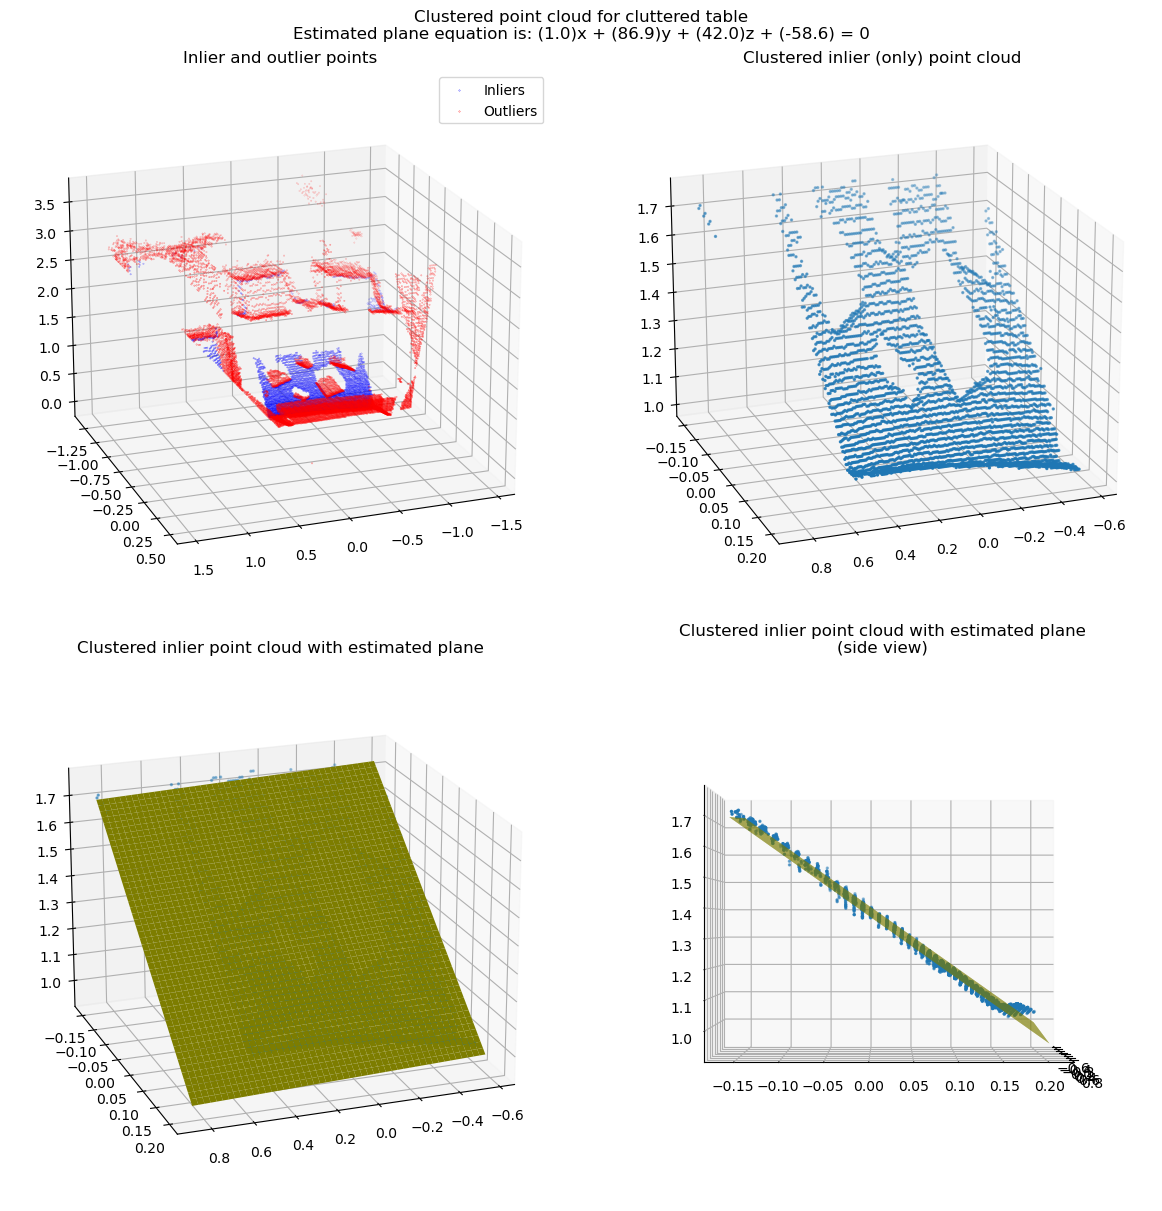

In [126]:
# Cluttered Table
dataset = cluttered
title = 'cluttered table'

params = RANSAC(dataset, 0.02)
inliers = dataset[params['inliersidx']]
outliers = dataset[params['outliersidx']]
a,b,c,d = params['planeparams']
plane_params['cluttered'] = params['planeparams']

# Kmeans clustering for seperating the table from other artifacts
table = clusterKmeans(inliers,2)                                     

# Create surface plane plot mesh
xmin, xmax = np.min(table[:,0]), np.max(table[:,0])
ymin, ymax = np.min(table[:,1]), np.max(table[:,1])
xx,yy,zz = createSurfacePlaneMesh(xmin, xmax, ymin, ymax, params['planeparams'])

plane_eq = 'Estimated plane equation is: (%.1f)x + (%.1f)y + (%.1f)z + (%.1f) = 0' %(a/a,b/a,c/a,d/a)
plotPlane(table, xx, yy, zz, inliers, outliers, title + '\n' + plane_eq)
print(plane_eq)

1. **Fig 1**:  shows the inlier (blue) and outlier (red) points in the point cloud after running the RANSAC algorithm.
2. **Fig 2**: After KMeans clustering on the inliers, we find the largest cluster of inlier points. **This is considered as the table point cloud.**
3. **Fig 3**: Superimposing the computed plane 
$$\boxed{x + 86.9y + 42.0z  -58.6 = 0}$$
on top of the table point cloud.

4. **Fig 4**: Side view of Fig 3, showing that the computed plane lines up very well with the table point cloud.

As is seen in Fig 1, the inlier points are scattered, since we have chairs and other objects in the plane of the table (*multiple blue regions*). In order to seperate the chair, we use KMeans clustering (for 2 or 3 groups) on the inlier dataset. We then choose the largest dataset as the table point cloud to estimate the plane parameters.

### Comparison of the two detected planes

Now we compare both of our estimated planes

$$\begin{aligned}
\text{Empty table}& \quad \boxed{x + 75.0y + 34.4z -48.1 = 0}\\
\text{Clustered table}& \quad \boxed{x + 86.9y + 42.0z  -58.6 = 0}
\end{aligned}$$

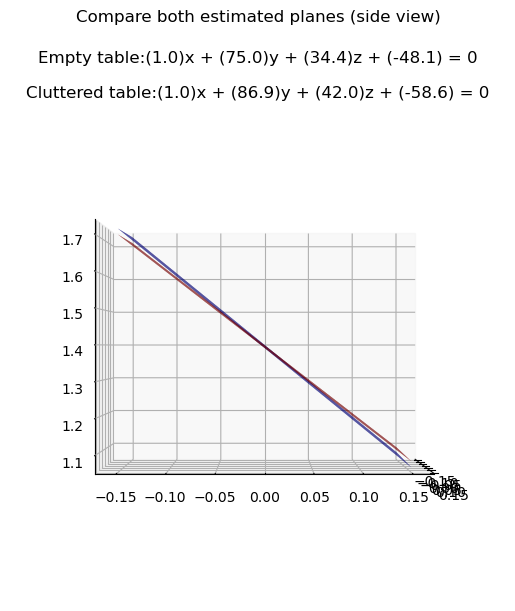

In [127]:
# Compare both detected planes
fig = plt.figure(figsize=(6,6), constrained_layout=True)
fig.suptitle('Compare both estimated planes (side view)')
axs=[]
axs.append(fig.add_subplot(111, projection='3d'))

xx,yy,zz = createSurfacePlaneMesh(-0.15, 0.15, -0.15, 0.15, plane_params['empty'])
axs[0].plot_surface(xx, yy, zz, label='Estimated plane from empty dataset', color='blue')

xx,yy,zz = createSurfacePlaneMesh(-0.15, 0.15, -0.15, 0.15, plane_params['cluttered'])
axs[0].plot_surface(xx, yy, zz, label='Estimated plane from cluttered dataset', color='red')

a,b,c,d = plane_params['empty']
plane_eq_empty = '(%.1f)x + (%.1f)y + (%.1f)z + (%.1f) = 0' %(a/a, b/a, c/a, d/a)
a,b,c,d = plane_params['cluttered']
plane_eq_cluttered = '(%.1f)x + (%.1f)y + (%.1f)z + (%.1f) = 0' %(a/a, b/a, c/a, d/a)
axs[0].set_title('\nEmpty table:' + plane_eq_empty + '\n\nCluttered table:' + plane_eq_cluttered)
axs[0].view_init(0,0)

For a sanity check, we can find the angle between the planes using
$$\theta = \cos^{-1}\left(\dfrac{|a_1a_2 + b_1b_2 + c_1c_2|}{\sqrt{a_1^2 + b_1^2 +c_1^2}.\sqrt{a_1^2 + b_1^2 +c_1^2}}\right)$$

In [128]:
a = np.array(plane_params['empty'])[:3]
b = np.array(plane_params['cluttered'])[:3]

theta = np.rad2deg(np.arccos(np.abs(np.dot(a,b))/(np.linalg.norm(a) * np.linalg.norm(b))))
print('Angle between the planes is %.1f degrees.' %theta)

Angle between the planes is 1.1 degrees.


As we observe, the detected planes are very close to each other. We find that the angle between the planes is $\theta = 1.1^{\circ} \approx 0^{\circ}$. This makes sense since both the planes hould be parallel top each other.

## Problem 2.b) Estimate plane parameters for CSE building

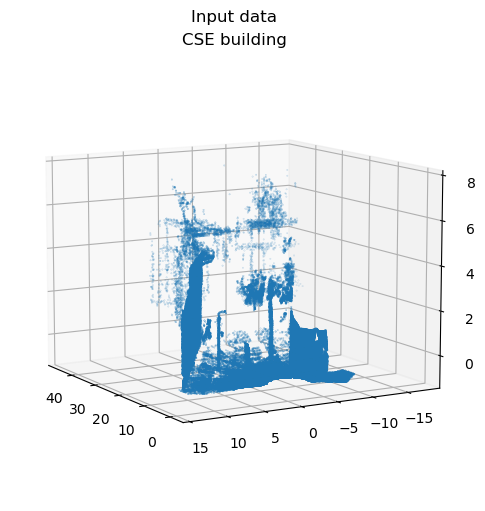

In [66]:
cse = np.unique(np.loadtxt('CSE.asc'), axis=0)

# Visualize input dataset
fig = plt.figure(figsize=(5,5), constrained_layout=True)
fig.suptitle('Input data')
axs=[]
axs.append(fig.add_subplot(111, projection='3d'))
axs[0].scatter(cse[:,0], cse[:,1], cse[:,2], s=0.05)
axs[0].set_title('CSE building')
axs[0].view_init(10,150)

For this problem, we use the **RANSAC** algorithm iteratively. 

1. We run the RANSAC algorithm to find the largest dominant plane from the point cloud (call this dataset $N_0$). Call the extracted plane *Plane 1*.
2. Next, we remove the points corressponding to _Plane 1_ from the dataset. We run RANSAC again on this modified dataset (with point cloud samples $N_1$) to extract _Plane 2_.
3. Repeat these steps until all planes are extracted. We stop when the number of points remaining in the dataset is less than the ratio of inliers (which is predetermined by $(1-e)$). Thus if we have $N_i$ samples in the point cloud (after extracting $i$ planes), then the iteration stops as soon as 
$$N_i < (1-e)N$$


- $p = 0.99$ (we want 99% accuracy in our result)
- $e = 0.6$ (Assume 60% outliers in our data, obtained empirically after plotting and observing data)
- $s = 3$ (To create a plane, we need to sample 3 points)

These parameters lead to $T=70$, which means we should compute 70 sampling iterations for the expected confidence.

We also assume the $d_\text{THRESH} = 0.2$ units (also obtained empirically by observing the data).

100%|██████████| 70/70 [00:06<00:00, 10.64it/s]


Estimated plane equation is: (1.0)x + (0.1)y + (-22.4)z + (-14.1) = 0


100%|██████████| 70/70 [00:02<00:00, 24.52it/s]


Estimated plane equation is: (1.0)x + (2.2)y + (0.1)z + (-31.0) = 0


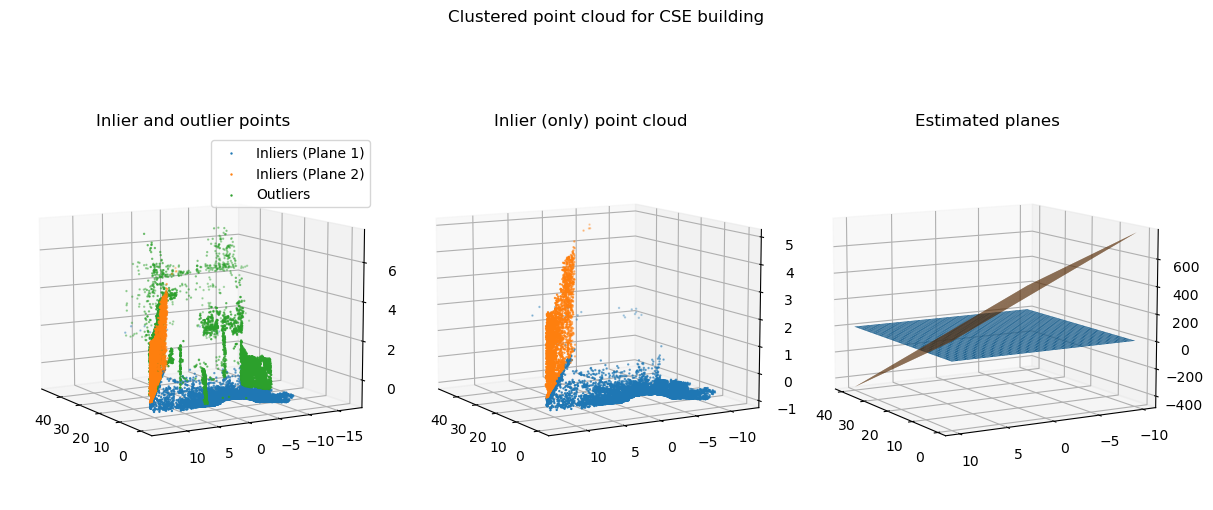

In [90]:
# CSE Building
import copy
n_planes = 0                                
params = {}             # Dict to store all the planes
dataset = cse[::10]


fig = plt.figure(figsize=(12,6), constrained_layout=True)
fig.suptitle('Clustered point cloud for CSE building')
axs=[]
axs.append(fig.add_subplot(131, projection='3d'))
axs.append(fig.add_subplot(132, projection='3d'))
axs.append(fig.add_subplot(133, projection='3d'))

modified_dataset = copy.deepcopy(dataset)

while len(modified_dataset) >= 0.4*len(dataset):
    
    n_planes+=1
    params[n_planes] = RANSAC(modified_dataset, 0.2)
    inliers = modified_dataset[params[n_planes]['inliersidx']]
    outliers = modified_dataset[params[n_planes]['outliersidx']]
    a,b,c,d = params[n_planes]['planeparams']

    axs[0].scatter(inliers[:,0], inliers[:,1], inliers[:,2], s=0.5, label='Inliers (Plane %d)'%n_planes)                                
    axs[1].scatter(inliers[:,0], inliers[:,1], inliers[:,2], s=0.5)

    # Create surface plane plot mesh
    # xmin, xmax = np.min(inliers[:,0]), np.max(inliers[:,0])
    # ymin, ymax = np.min(inliers[:,1]), np.max(inliers[:,1])
    xx,yy,zz = createSurfacePlaneMesh(0,40,-10,10, params[n_planes]['planeparams'])

    axs[2].plot_surface(xx, yy, zz, label='Estimated Plane %d'%n_planes)
    plane_eq = 'Estimated plane equation is: (%.1f)x + (%.1f)y + (%.1f)z + (%.1f) = 0' %(a/a,b/a,c/a,d/a)
    print(plane_eq)
    modified_dataset = np.delete(modified_dataset, params[n_planes]['inliersidx'], axis=0)        # remove detected plane points from dataset


axs[0].scatter(modified_dataset[:,0], modified_dataset[:,1], modified_dataset[:,2], s=0.5, label='Outliers')
axs[0].set_title('Inlier and outlier points')
axs[0].legend()
axs[0].view_init(10,150)

axs[1].set_title('Inlier (only) point cloud')
axs[1].view_init(10,150)

axs[2].set_title('Estimated planes')
axs[2].view_init(10,150)

Thus we observe that we were able to extract 2 dominant planes from the CSE building data. The plane equations are,
$$
\boxed{x + 0.1y -22.4z -14.1 = 0} 
$$
$$\boxed{x + 2.2y -0.1z -31.0 = 0}
$$

The two planes obtained seem like the **ground** and **building front wall**. For a sanity check, we can find the angle between the planes using
$$\theta = \cos^{-1}\left(\dfrac{|a_1a_2 + b_1b_2 + c_1c_2|}{\sqrt{a_1^2 + b_1^2 +c_1^2}.\sqrt{a_1^2 + b_1^2 +c_1^2}}\right)$$

In [102]:
a = params[1]['planeparams'][:3]
b = params[2]['planeparams'][:3]

theta = np.rad2deg(np.arccos(np.abs(np.dot(a,b))/(np.linalg.norm(a) * np.linalg.norm(b))))
print('Angle between the planes is %.1f degrees.' %theta)

Angle between the planes is 89.7 degrees.


Thus we find that the angle between the planes is $\theta = 89.7^{\circ} \approx 90^{\circ}$. This makes sense since the ground and the wall of the building are perpendicular to each other.